# Getting Started - Further Details

This notebook will introduce all of the other parameters currently in the iDEA code. Note that the explanations are only very brief, so if a proper and full understanding is to be gained, study the relevent theory notebooks. There are elementary exercises at the end of each section to test understanding, with model answers at the end of the notebook. *They are considered elementary as they should only involve changing the values of relevent parameters and plotting the result*


In [2]:
# Setting up - same as previous notebook
from iDEA.input import Input
pm = Input.from_python_file('parameters.py')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from iDEA.input import Input
from iDEA.results import Results as rs


## Further Parameters

### Exact Many-body Calculation

The exact many-body calculation is done by propagating the wavefunction in imaginary time, which eventually converges on the ground-state energy. The exact (ext) parameters are as follows:

* **ext.itol**           - Tolerance of imaginary time propagation                  (~ 1e-12)
* **ext.itol_solver**    - Tolerance of linear solver in imaginary time propagation (~ 1e-14)
* **ext.rtol_solver**    - Tolerance of linear solver in real time propagation      (~ 1e-12)
* **ext.itmax**          - Total imaginary time
* **ext.iimax**          - Imaginary time iterations
* **ext.ideltat**        - Imaginary time step (DERIVED)
* **ext.RE**             - Reverse engineer many-body density
* **ext.OPT**            - Calculate the external potential for the exact density
* **ext.excited_states** - Number of excited states to calculate (0 for only ground-state)
* **ext.psi_gs**         - Save the reduced ground-state wavefunction to file
* **ext.psi_es**         - Save the reduced excited-state wavefunctions to file
* **ext.initial_psi**    - initial wavefunction: qho, non, hf, lda1/2/3/heg, ext or wavefunction from previous run (e.g run_name)

Tolerance describes the difference between, say for example, densities between iterations before a successful convergence has occured.

Note that in the exercises, if a variable is not specified, such as electron number, take it to be the default value set in the parameters file.
#### Exercise 1

Perfom exact many-body calculations for the ground state first excited state and calculate the relevent ELF. Display these results in a graph. 
*HINT: start by printing the parameters to find out what needs to be changed to get the desired result.*

### Non-interaction approximation

This is the simplest form of DFT, which acts as a baseline comparison to see whether an approximation, like the LDA, gives a good result compared to the non interacting result. The parameters are as follows:

* **non.rtol_solver** - Tolerance of linear solver in real time propagation (~e-13)
* **non.save_eig**    - Save eigenfunctions and eigenvalues of Hamiltonian
* **non.RE**          - Reverse-engineer non-interacting density
* **non.OPT**         - Calculate the external potential for the non-interacting density


### Local Density Approximation

This is the most common approximation used in DFT. The parameters are as follows:

* **lda.NE**                   - number of electrons used for LDA construction (1, 2, 3, 'heg')
* **lda.scf_type**            - scf type (linear, pulay, cg)
* **lda.mix**                  - mixing parameter for linear and Pulay mixing (between 0 and 1)
* **lda.pulay_order**          - history length for Pulay mixing (max: lda.max_iter)
* **lda.pulay_preconditioner** - preconditioner for Pulay mixing (None, kerker, rpa)
* **lda.kerker_length**        - length over which density flunctuations are screened (Kerker)
* **lda.tol**                  - convergence tolerance in the density
* **lda.etol**                 - convergence tolerance in the energy
* **lda.max_iter**             - maximum number of self-consistency iterations
* **lda.save_eig**             - save eigenfunctions and eigenvalues of Hamiltonian
* **lda.OPT**                  - calculate the external potential for the LDA density

For the number of electrons, 'heg' is an acronym for 'homogeneous electron gas'. There are also the types of self-consistency available: 'linear', 'pulay' and 'cg'. 'Linear' is the least complicated and used in most situations. Density fluctuations can occur, which prevents LDA from reaching self-consistency. These different methods and mixing of methods will help reach self-consistency.

#### Exercise 2

Perform DFT calculations for 2 electrons with the LDA approximations using 'heg' and compare with the non-interaction approximation and exact calculation by plotting the electron densities. *HINT: take a look at the parameters file directly if one cannot determine which parameter needs to be changed from the notebook's description of the parameters.*

### Hartree-Fock calculation

The Hartree-Fock method is an alternative to DFT and is essentially a simplified version of many-body perturbation theory. The parameters are as follows:

* **hf.fock**     - include Fock term ( 0 = Hartree approximation, 1 = Hartree-Fock approximation)
* **hf.con**      - tolerance
* **hf.nu**       - mixing term
* **hf.save_eig** - save eigenfunctions and eigenvalues of the Hamiltonian
* **hf.RE**       - reverse engineering HF density
* **hf.OPT**      - calculate the external potential from the HF density


#### Exercise 3

Compare the electron densities for a two-electron system with the exact, non-interacting and HF. *HINT: each cycle will produce an output file. If ever in doubt of what your outputs are, take a direct look in **outputs/run_name/raw**. (run_name being the default name)*

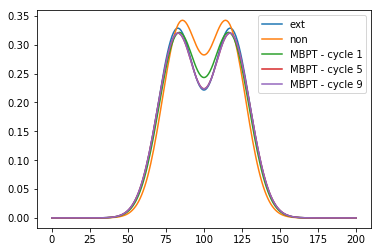

### Reverse Engineering

The Reverse Engineering algorithm (for both time-independent and time-dependent systems) take the exact electron density and 'reverse engineers' the exact Kohn-Sham potential for the system. The parameters are as follows:

* **re.save_eig**           - save Kohn-Sham eigenfunctions and eigen values of reverse-engineered potential
* **re.stencil**            - discretisation of 1st derivative (5 or 7)
* **re.mu**                 - 1st convergence parameter in the ground-state reverse-engineering algorithm
* **re.p**                  - 2nd convergence parameter in the GS RE algorithm
* **re.nu**                 - convergence parameter in the time-dependent RE algorithm
* **re.rtol_solver**        - tolerance of the linear solver in real-time propagation (~1e-12)
* **re.density_tolerance**  - tolerance of the error in the time_dependent density
* **re.cdensity_tolerance** - tolerance of the error in the current density
* **re.max_iterations**     - maximum number of iterations per time step to find the Kohn-Sham potential
* **re.damping**            - damping factor used when filtering out noise in the Kohn-Sham vector potential (0: none)

#### Exercise 4

Reverse engineer the Kohn-Sham potential from the exact density from one of the previous exercises. The exact densities are, in fact, the same for all the exercises so the result should be the same regardless. *HINT: make sure to set the reverse-engineering parameter to True.*  

## Model Answers

In [ ]:
#Exercise 1
# As always set a run_name
pm.run.name = 'exercise_1'

# Turn on the correct parameters
pm.run.NON = False
pm.run.EXT = True
pm.ext.elf_gs = True
pm.ext.elf_es = True
pm.ext.excited_states = 1

# Start the simulation
results = pm.execute()

# Plotting the results
ex1_results = rs.read("es_ext_elf1",pm)
plt.plot(ex1_results, label="ELF - 1st excited state")
plt.legend()
plt.show()

In [ ]:
#Exercise 2
# Setting up the parameters
# run
pm.run.name = 'exercise_2'
pm.run.NON = True
pm.run.LDA = True
pm.run.EXT = True
# sys
pm.sys.NE = 2
# lda
pm.lda.NE = 'heg'

# Starting the simulation
results = pm.execute()

# Plotting the results
ex2_lda = rs.read("gs_ldaheg_den",pm)
ex2_ext = rs.read("gs_ext_den",pm)
ex2_non = rs.read("gs_non_den",pm)

plt.plot(ex2_lda, label="lda - heg")
plt.plot(ex2_ext, label="ext")
plt.plot(ex2_non, label="non")
plt.legend()
plt.show()

In [ ]:
# Exercise 3
# Setting up the parameters
# run
pm.run.name = 'exercise_3'
pm.run.NON  = True
pm.run.EXT  = True
pm.run.HF   = True

#results = pm.execute()

# Plotting the results
ex3_ext   = rs.read("gs_ext_den",pm)
ex3_non   = rs.read("gs_non_den",pm)
ex3_hf    = rs.read("gs_hf_den",pm)

plt.plot(ex3_ext, label="ext")
plt.plot(ex3_non, label="non")
plt.plot(ex3_hf,  label="hf")
plt.legend()
plt.show()

In [ ]:
# Exercise 4
# Setting up the parameters

# Reverse-engineering the exact density from exercise 2, so need to be
# working out of the subdirectory containing that.
pm.run.name = 'exercise_2'
# turn off exact so that it won't rerun and overwite the previous data
pm.run.EXT = False
# turn off any unrelated parameters
pm.run.NON = False

# Turning on reverse-engineering
pm.ext.RE = True

#results = pm.execute()

# Plotting the results
ex4_RE   =  rs.read("gs_extre_vks",pm)
plt.plot(ex4_RE, label="reverse-engineered ext")

plt.legend()
plt.show()